<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9C.%D0%9E./%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd  # импортирую библиотеки для работы с данными, разделения данных на обучающую и тестовую выборки, оценки качества модели
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  #  метрика для оценки качества модели
from sklearn.linear_model import LinearRegression  # линейная регрессия для построения модели
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

from google.colab import drive  # подключение гуглдиска
drive.mount('/content/gdrive')

df = pd.read_csv('gdrive/My Drive/МО/daily-minimum-temperatures-in-me.csv')

df['Date'] = pd.to_datetime(df['Date'])  # преобразую столбец 'Date' в формат даты и времени
df.set_index('Date', inplace=True)  # делаю столбец 'Date' в качестве индекса

df['Month'] = df.index.month  # создаю новый столбец 'Month', извлекая месяц из индекса
df['Day'] = df.index.day  # создаю новый столбец 'Day', извлекая день из индекса
df['Year'] = df.index.year  # Я создаю новый столбец 'Year', извлекая год из индекса

X = df[['Month', 'Day', 'Year']]  # матрица признаков (столбцы 'Month', 'Day' и 'Year')
y = df['Daily minimum temperatures']  # целевая переменная (столбец с минимальными температурами)



Mounted at /content/gdrive


In [3]:
df.head()

,Daily minimum temperatures,Month,Day,Year
Date,,,,
1981-01-01,20.7,1,1,1981
1981-01-02,17.9,1,2,1981
1981-01-03,18.8,1,3,1981
1981-01-04,14.6,1,4,1981
1981-01-05,15.8,1,5,1981


In [4]:
# Определяем тестовый период (1 год и 6 месяцев)
test_size = 18 * 30  # 18 месяцев, предположим, что в среднем 30 дней в месяце
X_train = X[:-test_size]
y_train = y[:-test_size]
X_test = X[-test_size:]
y_test = y[-test_size:]


In [5]:
# Обучение моделей
models = {
    "Linear Regression": LinearRegression(), # экземпляр модели линейной регрессии
    "Random Forest": RandomForestRegressor(n_estimators=100), # экземпляр модели случайного леса с 100 деревьями
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100) # экземпляр модели градиентного бустинга с 100 деревьями
}


# Linear Regression (Линейная регрессия). Эта модель используется для предсказания числовых значений
# на основе линейной зависимости между входными переменнымии целевой переменной (значением, которое мы хотим предсказать)
# Random Forest (Случайный лес). Случайный лес — это ансамблевая модель, которая использует множество деревьев решений для улучшения предсказаний и уменьшения переобучения.
# Каждое дерево в лесу делает предсказание, и итоговое предсказание — это среднее (или мода) предсказаний всех деревьев.
# Gradient Boosting (Градиентный бустинг). Градиентный бустинг является ансамблевой моделью, но он строит деревья последовательно,
# где каждое новое дерево исправляет ошибки предыдущих. Это позволяет модели более точно подстраиваться под данные.

results = {} # пустой словарь для хранения результатов моделей

for name, model in models.items(): # цикл по моделям для обучения
    model.fit(X_train, y_train) # обучаю модель на обучающих данных
    predictions = model.predict(X_test) # предсказания на тестовых данных с помощью обученной модели
    mse = mean_squared_error(y_test, predictions) # вычисляю среднеквадратичную ошибку для предсказаний
    results[name] = mse # сохраняю результаты в словаре, используя имя модели в качестве ключа

# использование имени модели в качестве ключа позволяет эффективно и удобно управлять результатами обучения моделей


MSE Linear Regression: 14.923975857213811
MSE Random Forest: 11.078035918518527
MSE Gradient Boosting: 6.73901792888079


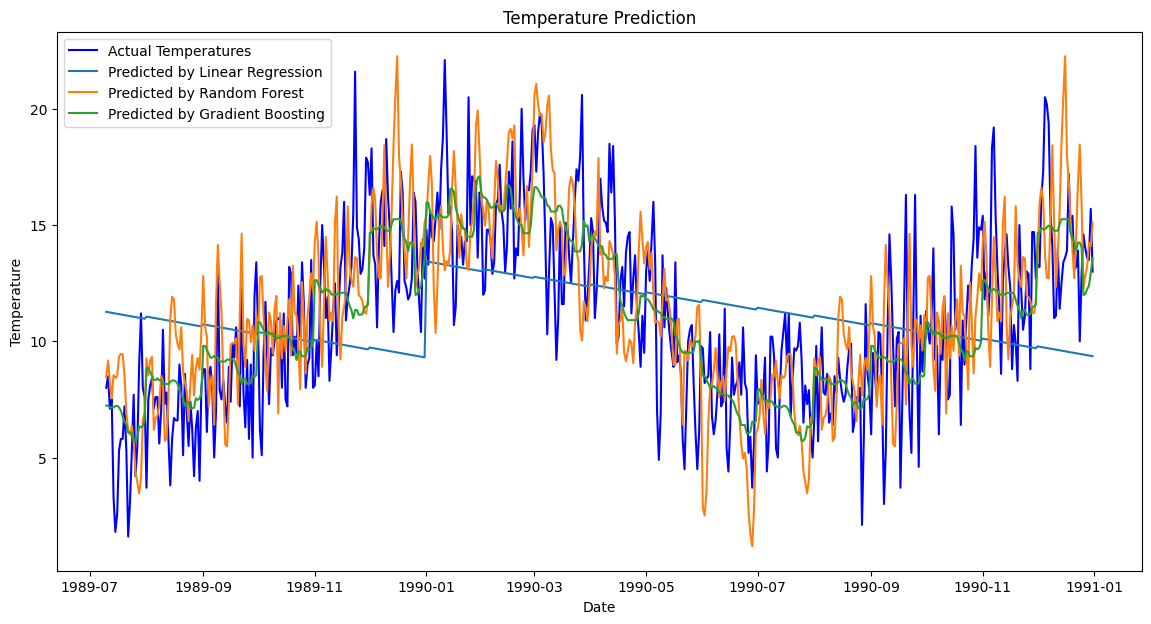

In [6]:
for name, mse in results.items():  # перебирание элементов в словаре результатов, для получения имени модели и соответствующую среднеквадратичную ошибку
    print(f'MSE {name}: {mse}')  # вывод среднеквадратичной ошибки для каждой модели

# Визуал
plt.figure(figsize=(14, 7))  # задание размеров
plt.plot(y_test.index, y_test, label='Actual Temperatures', color='blue')  # линия температур

for name, model in models.items():  # перебирание модели для прогнозирования.
    predictions = model.predict(X_test)  # модель для предсказания температур на тестовых данных
    plt.plot(y_test.index, predictions, label=f'Predicted by {name}')  # линия для предсказанных температур

plt.xlabel('Date')  # подпись для оси X, даты
plt.ylabel('Temperature')  # подпись для оси Y, температуры.
plt.title('Temperature Prediction')  # заголовок графика, для предсказания температуры
plt.legend()  # легенда на график
plt.show()  # вывод графика


In [7]:
# Импорт метрик
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Загрузка данных
url = "https://raw.githubusercontent.com/jenfly/opsd/refs/heads/master/opsd_germany_daily.csv"
df = pd.read_csv(url)  # Чтение данных

# Преобразование столбца даты в формат datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Установка даты в качестве индекса DataFrame


df.fillna(method='ffill', inplace=True)


y = df['Consumption']


df['Year'] = df.index.year  # Извлечение года из индекса
df['Month'] = df.index.month  # Извлечение месяца из индекса
df['Day'] = df.index.day  # Извлечение дня из индекса


test_sizes = range(1, 13)

# Словарь для хранения результатов
results = {
    'Test Size (months)': [],  # Размер теста в месяцах
    'R²': [],  # Коэффициент детерминации
    'RMSE': [],  # Корень из среднеквадратичной ошибки
    'MAE': [],  # Средняя абсолютная ошибка
    'MSE': []   # Среднеквадратичная ошибка
}


for months in test_sizes:
    test_size = months * 30  # Взяла среднее значение в 30 месяцев

    X_train = df.iloc[:-test_size][['Year', 'Month', 'Day']]   # Обучающая выборка
    y_train = y[:-test_size]

    X_test = df.iloc[-test_size:][['Year', 'Month', 'Day']] # Тестовая выборка
    y_test = y[-test_size:]


    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
    }


    for name, model in models.items():
        model.fit(X_train, y_train)  # Обучение модели на обучающей выборке
        predictions = model.predict(X_test)  # Прогнозирование на тестовой выборке

        # Оценка метрик производительности модели
        r2 = r2_score(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)

        # Сохранение результатов в словарь
        results['Test Size (months)'].append(months)
        results['R²'].append(r2)
        results['RMSE'].append(rmse)
        results['MAE'].append(mae)
        results['MSE'].append(mse)

<ipython-input-7-3553a2280cf6>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


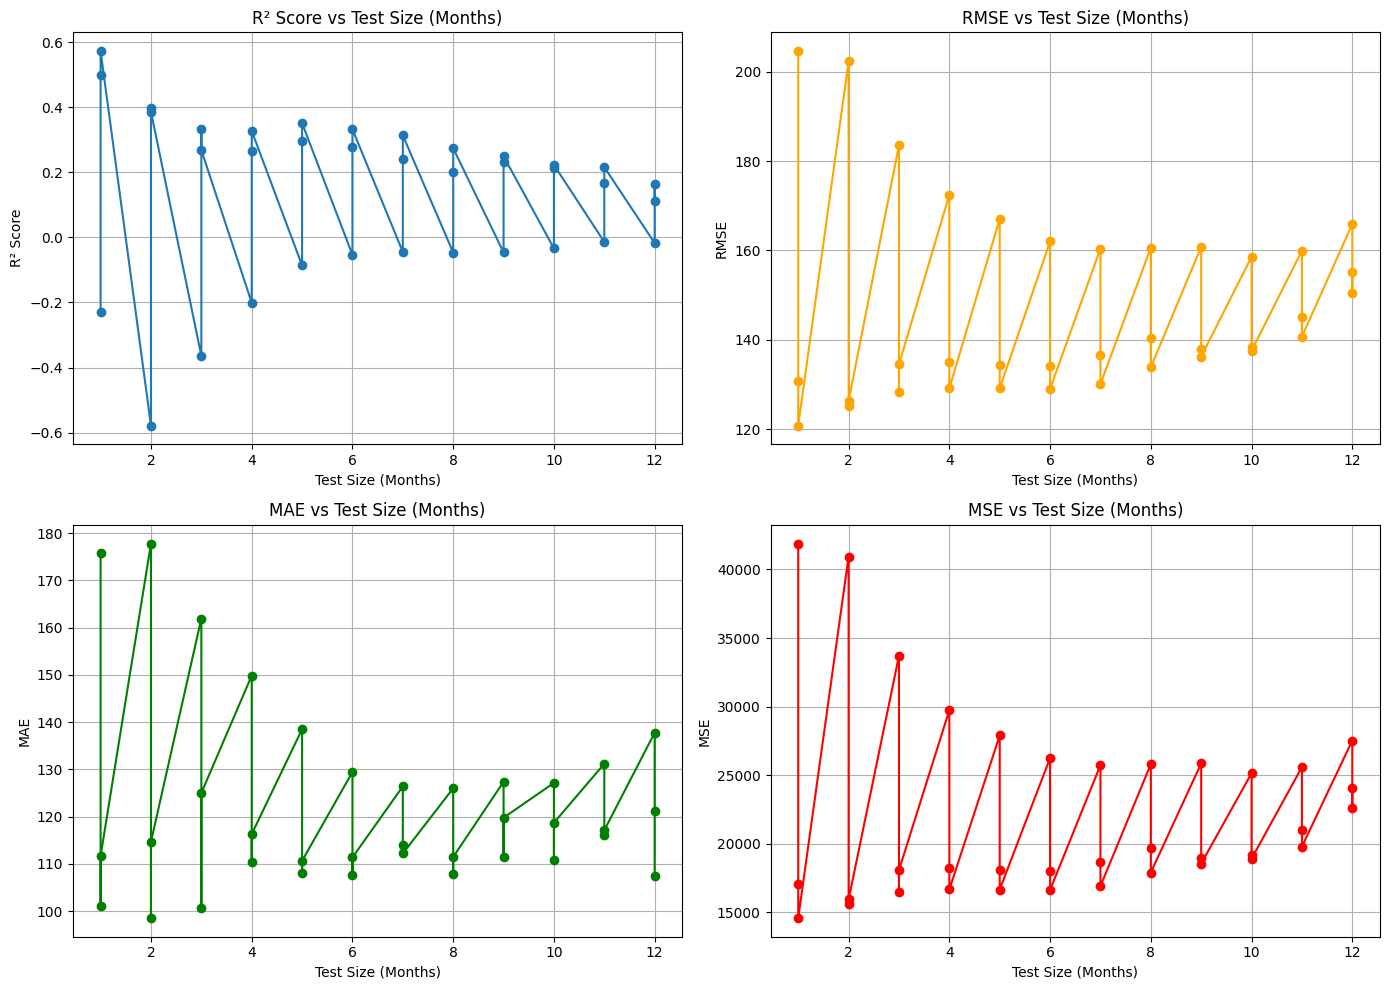

In [8]:
# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)

# Построение графиков с заданным размером фигуры
plt.figure(figsize=(14, 10))

#  для R²
plt.subplot(2, 2, 1)
plt.plot(results_df['Test Size (months)'], results_df['R²'], marker='o')  # Построение линии
plt.title('R² Score vs Test Size (Months)')  # Заголовок графика
plt.xlabel('Test Size (Months)')  # ось X
plt.ylabel('R² Score')  # ось Y
plt.grid()

#для RMSE
plt.subplot(2, 2, 2)
plt.plot(results_df['Test Size (months)'], results_df['RMSE'], marker='o', color='orange')
plt.title('RMSE vs Test Size (Months)')
plt.xlabel('Test Size (Months)')
plt.ylabel('RMSE')
plt.grid()

# для MAE
plt.subplot(2, 2, 3)
plt.plot(results_df['Test Size (months)'], results_df['MAE'], marker='o', color='green')
plt.title('MAE vs Test Size (Months)')
plt.xlabel('Test Size (Months)')
plt.ylabel('MAE')
plt.grid()

# Построение графика для MSE
plt.subplot(2, 2, 4)
plt.plot(results_df['Test Size (months)'], results_df['MSE'], marker='o', color='red')
plt.title('MSE vs Test Size (Months)')
plt.xlabel('Test Size (Months)')
plt.ylabel('MSE')
plt.grid()

plt.tight_layout()  # Автоматическая настройка расположения подграфиков для предотвращения наложения
plt.show()  # Отображение графиков


In [9]:
results_df # вывод результата

,Test Size (months),R²,RMSE,MAE,MSE
0,1,-0.227921,204.665215,175.803904,41887.850422
1,1,0.498803,130.756436,101.175015,17097.245589
2,1,0.572278,120.792355,111.704987,14590.793073
3,2,-0.578010,202.344845,177.779795,40943.436421
4,2,0.397203,125.061195,98.549586,15640.302397
5,2,0.385657,126.253298,114.685791,15939.895319
6,3,-0.363960,183.574879,161.909652,33699.736211
7,3,0.333848,128.291882,100.693790,16458.807049
8,3,0.268110,134.473134,124.998223,18083.023758
9,4,-0.200895,172.474153,149.833105,29747.333607
